<a href="https://colab.research.google.com/github/astrapi69/DroidBallet/blob/master/MLG_D7_LC3_Dimensionality_Reduction_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='Q0'></a>
<center><a target="_blank" href="https://academy.constructor.org/"><img src="https://jobtracker.ai/static/media/constructor_academy_colour.b86fa87f.png" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

<center> <h1> Unsupervised Learning: Dimensionality Reduction Techniques (Live Coding) </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>Constructor Academy, 2024</center>


# Dimensionality Reduction (Live Coding)

__Topics covered__

- LLE
- PCA
- tSNE
- Pipeline steps for dimensionality reduction




For this live coding we will use Swiss Roll dataset: `from sklearn.datasets import make_swiss_roll`

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#%load_ext autoreload
#%autoreload 2
# %load_ext lab_black

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import re
from sklearn.preprocessing import LabelEncoder

In [ ]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 8)

The labels for swiss roll 'clusters' are already included in `datasets.make_swiss_roll` from sklearn. We can just import it along with the roll coordinates

In [ ]:
from sklearn import datasets
X, color = datasets.make_swiss_roll(n_samples=1500)

In [ ]:
X

array([[10.8724649 ,  3.84087242,  7.42426654],
       [ 2.90386926, 14.3746135 ,  6.86489135],
       [ 5.03194836, 17.55837804, -2.82641885],
       ...,
       [-6.1836976 ,  9.03786189, -8.30670969],
       [-9.4772905 ,  9.78003332, -1.00298407],
       [12.29956791,  9.08948143, -1.75723373]])

## Dimensionality Reduction techniques for Visualizing

### Locally Linear Embedding (LLE) of the swiss roll


In [ ]:
from sklearn.manifold import locally_linear_embedding

In [ ]:
X_r, err = locally_linear_embedding(X, n_neighbors=12, n_components=2)
print("Done. Reconstruction error: %g" % err)

Done. Reconstruction error: 9.64614e-08



#### Plot  result


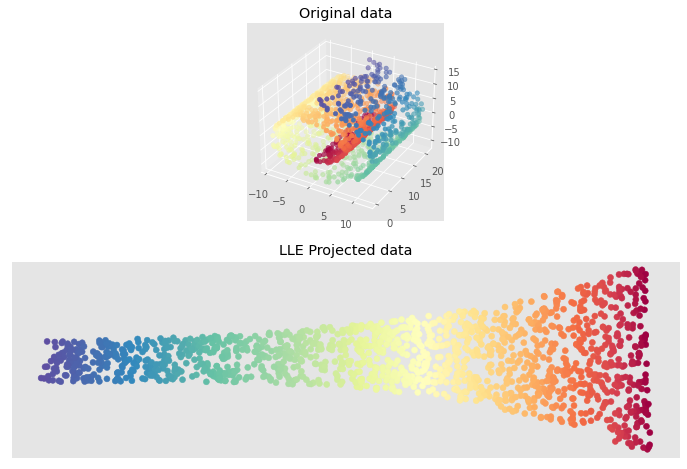

In [ ]:
fig = plt.figure()

# plot original roll
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")

# plot projected roll
ax = fig.add_subplot(212)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('LLE Projected data')
plt.show()

### Principal Component Analysis (PCA) of the swiss roll


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

array([[ 3.24772989e-03,  4.98074451e+00],
       [-7.20536651e-02,  9.78534119e+00],
       [ 3.16762806e+00, -5.96697657e+00],
       ...,
       [-9.62877628e+00, -6.39440313e+00],
       [ 1.09808258e+01, -3.78886614e+00],
       [-9.82111516e+00, -4.66541808e-01]])

#### Plot result

Text(0.5, 1.0, 'Projected data (components 1 and 2)')

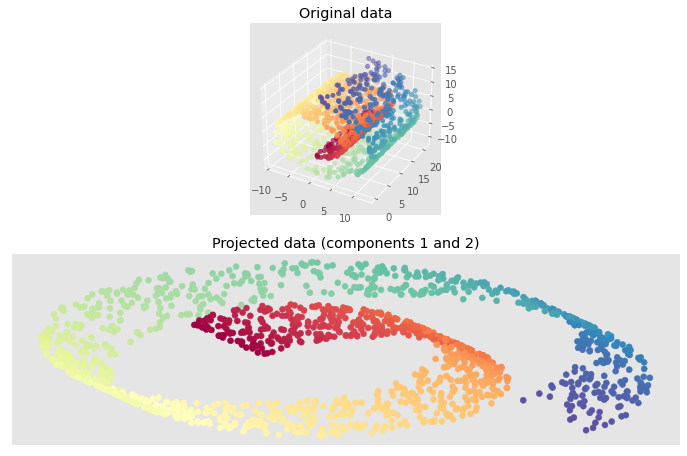

In [ ]:
plt.rcParams["figure.figsize"] = (12, 12)

fig = plt.figure()

# plot original roll
ax = fig.add_subplot(311, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")

# plot projected roll (components 1 and 2)
ax = fig.add_subplot(312)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data (components 1 and 2)')

# # plot projected roll (components 2 and 3)
# ax = fig.add_subplot(313)
# ax.scatter(X_pca[:, 1], X_pca[:, 2], c=color, cmap=plt.cm.Spectral)
# plt.axis('tight')
# plt.xticks([]), plt.yticks([])
# plt.title('Projected data (components 2 and 3)')
# plt.show()



In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
X_pca

array([[ 3.24772989e-03,  4.98074451e+00,  1.66643898e+00],
       [-7.20536651e-02,  9.78534119e+00, -5.34025331e+00],
       [ 3.16762806e+00, -5.96697657e+00,  6.24094286e+00],
       ...,
       [-9.62877628e+00, -6.39440313e+00, -1.64174976e+00],
       [ 1.09808258e+01, -3.78886614e+00,  6.89001318e+00],
       [-9.82111516e+00, -4.66541808e-01, -1.16015551e+01]])

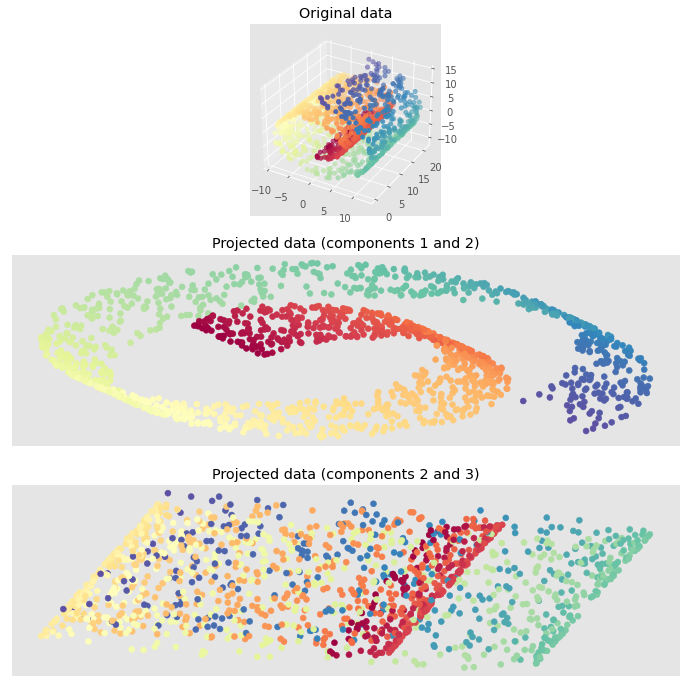

In [ ]:
plt.rcParams["figure.figsize"] = (12, 12)

fig = plt.figure()

# plot original roll
ax = fig.add_subplot(311, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")

# plot projected roll (components 1 and 2)
ax = fig.add_subplot(312)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data (components 1 and 2)')

# plot projected roll (components 2 and 3)
ax = fig.add_subplot(313)
ax.scatter(X_pca[:, 1], X_pca[:, 2], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data (components 2 and 3)')
plt.show()



### t-distributed Stochastic Neighbor Embedding  (tSNE) of the swiss roll


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
X_tsne = tsne.fit_transform(X)
X_tsne

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.001s...
[t-SNE] Computed neighbors for 1500 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 2.718216
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.637756
[t-SNE] KL divergence after 1000 iterations: 0.459343


array([[ 18.905811 , -23.233692 ],
       [ -2.5363486,  17.82316  ],
       [ -3.3434224, -22.696592 ],
       ...,
       [-17.461388 ,  -1.0917877],
       [ 12.435526 ,  34.80154  ],
       [-11.460477 ,   6.2643127]], dtype=float32)

#### Plot result

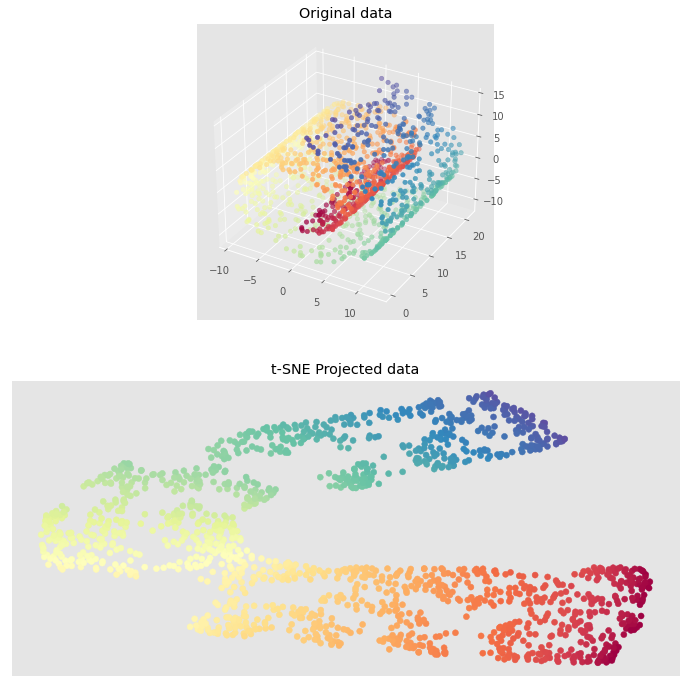

In [ ]:
fig = plt.figure()

# plot original roll
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")

# plot projected roll
ax = fig.add_subplot(212)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('t-SNE Projected data')
plt.show()


plt.show()

## PCA combined with Kmeans

It can be quite useful to use dimensionality reduction techniques for visualizing clustering results. Below we combine PCA with a KMeans clustering model and visualize the clusters projected onto the first two principal components.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [ ]:
pipe_pca_kmean = Pipeline(
        [
            ("pca", PCA(n_components=2)),
            ("cluster", KMeans(n_clusters=5, verbose=0))]
    )

In [ ]:
pipe_pca_kmean.fit(X)

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('cluster', KMeans(n_clusters=5))])

In [ ]:
pipe_pca_kmean.predict(X)

array([2, 2, 3, ..., 4, 1, 4], dtype=int32)

In [ ]:
kmean_cluster = pd.DataFrame(
    data = pipe_pca_kmean.named_steps["cluster"].labels_,
    columns=['kmean_cluster']
)

In [ ]:
#assigned k mean clusters, after pca
kmean_cluster

,kmean_cluster
0,2
1,2
2,3
3,0
4,3
...,...
1495,1
1496,1
1497,4
1498,1


In [ ]:
kmean_cluster['kmean_cluster'].value_counts()

2    366
1    366
0    297
3    238
4    233
Name: kmean_cluster, dtype: int64

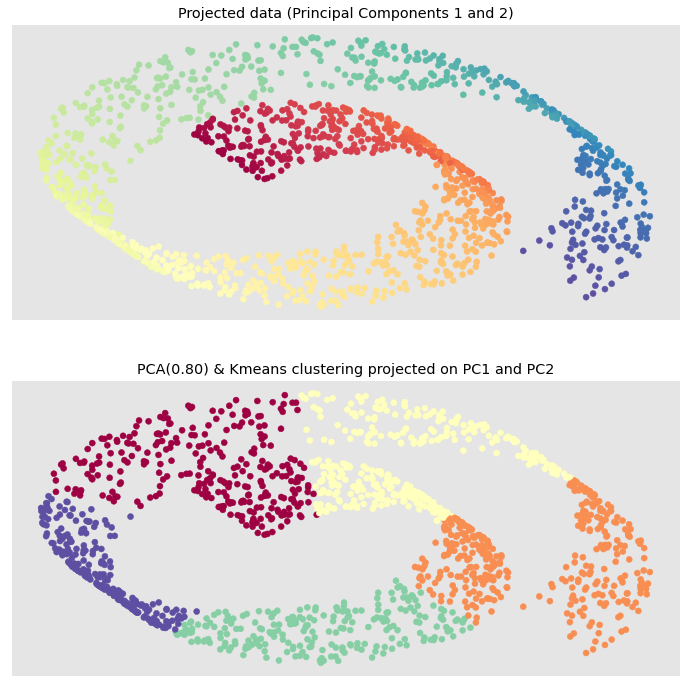

In [ ]:
fig = plt.figure()

# plot PCA roll
ax = fig.add_subplot(211)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Projected data (Principal Components 1 and 2)")
plt.xticks([]), plt.yticks([])

# plot clusters
ax = fig.add_subplot(212)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmean_cluster['kmean_cluster'], cmap=plt.cm.Spectral)
plt.title('PCA(0.80) & Kmeans clustering projected on PC1 and PC2')
plt.axis('tight')
plt.xticks([]), plt.yticks([])


fig.show()